In [2]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [3]:
import pandas as pd

df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df = df.dropna()
print(df.shape)
print("-"*20)
df.dtypes

(1338, 7)
--------------------


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

3 категориальных признака

In [7]:
print( df['sex'].unique() )
print("-"*20)
df['sex'].value_counts()

['female' 'male']
--------------------


male      676
female    662
Name: sex, dtype: int64

In [8]:
print( df['smoker'].unique() )
print("-"*20)
df['smoker'].value_counts()

['yes' 'no']
--------------------


no     1064
yes     274
Name: smoker, dtype: int64

In [9]:
print( df['region'].unique() )
print("-"*20)
df['region'].value_counts()

['southwest' 'southeast' 'northwest' 'northeast']
--------------------


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [10]:
from sklearn import preprocessing


label_encoder = preprocessing.LabelEncoder() 
label_encoder1 = preprocessing.LabelEncoder() 
label_encoder2 = preprocessing.LabelEncoder() 


label_encoder.fit(df['sex']) 
label_encoder1.fit(df['smoker']) 
label_encoder2.fit(df['region']) 


df['sex'] = label_encoder.transform(df['sex']) 
df['smoker'] = label_encoder1.transform(df['smoker']) 
df['region'] = label_encoder2.transform(df['region']) 

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [12]:
print(label_encoder.classes_)
print("-"*20)
print(label_encoder1.classes_)
print("-"*20)
print(label_encoder2.classes_)

['female' 'male']
--------------------
['no' 'yes']
--------------------
['northeast' 'northwest' 'southeast' 'southwest']


In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [15]:
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']].values
y = df['charges'].values
features = pd.Series(['age', 'sex', 'bmi', 'children', 'smoker', 'region'])
features

0         age
1         sex
2         bmi
3    children
4      smoker
5      region
dtype: object

In [16]:
slr = LinearRegression()

slr.fit(X, y)

coeff_df = pd.DataFrame(slr.coef_, columns=['Coefficient'])  
coeff_df['features'] = features

coeff_df

,Coefficient,features
0,257.288075,age
1,-131.110580,sex
2,332.570132,bmi
3,479.369394,children
4,23820.434123,smoker
5,-353.640017,region


In [17]:
slr.intercept_

-11815.452321231372

-11815.452321231372 + 257.288075*age - 131.110580*sex + 332.570132*bmi + 479.369394*children + 23820.434123*smoker - 353.640017*region

In [29]:
X = df[['smoker']].values
y = df['charges'].values

slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)

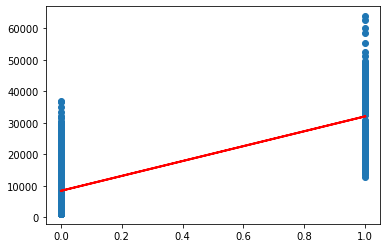

In [30]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, y_pred, color='red', linewidth=2)

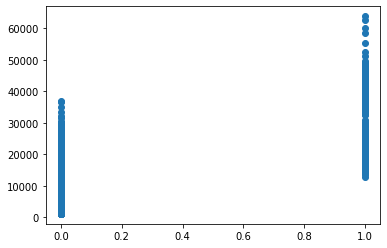

In [31]:
plt.scatter(X, y)

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MSE: {:.3f}'.format(mean_squared_error(y, y_pred)))

MSE: 55720715.954
